### Causal Graphs

Causal graphs are fairly easy to create in Python.  We just need to recall the definition of a *node* and an *edge*.  A *node* is a point on the graph (in causal graphs, these represent data); an *edge* is a line that connects two nodes.  In causal diagrams, edges are *directed* arrows with a *head* (where the arrow points to) and a *tail* (where the arrow points from).

The `graphviz` module makes plotting graphs easy.  We'll create a `Digraph` (short for directed graph).

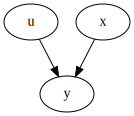

In [1]:
import graphviz
g1 = graphviz.Digraph('G')
g1.node('u')
g1.edge('x', 'y')
g1.edge('u', 'y')
g1

Rather than use the `graphviz` module directly, we can use the `causalgraphicalmodels` module, which creates a suite of tools that work on top of graphviz diagrams.

To install the module, we need to use the `!pip` magic command.

In [2]:
!pip install causalgraphicalmodels --user

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


The syntax of a `causalgraphicalmodels` graph is slightly different than the `graphiz` module.  Here, we specify a list of nodes as well as a list of directed edges.  It is standard to list directed edges as a (tail, head) set of nodes.

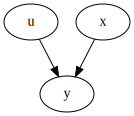

In [3]:
from causalgraphicalmodels import CausalGraphicalModel
g2 = CausalGraphicalModel(
    nodes=["x", "y", "u"],
    edges=[
        ("x", "y"),
        ("u", "y")
    ]
)
g2.draw()

The advantage of using this module is that it has causal analysis tools built in.  We can check for backdoor paths from $x$ to $y$ with the `get_all_backdoor_paths()` function.

In [4]:
print(g2.get_all_backdoor_paths("x", "y"))

[]


An empty list indicates that there is no backdoor path!  If the causal model is true, then we can estimate a causal effect of $x$ on $y$.

Let's modify the above graph to include a fork $x \leftarrow u \rightarrow y$.

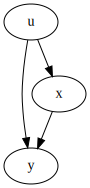

In [5]:
g3 = CausalGraphicalModel(
    nodes=["x", "y", "u"],
    edges=[
        ("x", "y"),
        ("u", "y"),
        ("u", "x")
    ]
)
g3.draw()

The above graph has a backdoor path $x \leftarrow u \rightarrow y$.

In [6]:
print(g3.get_all_backdoor_paths("x", "y"))

[['x', 'u', 'y']]


Let's reverse the position of $x$ and $u$ such that $x$ now sits in the middle of the fork.

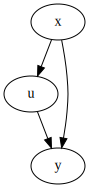

In [7]:
g4 = CausalGraphicalModel(
    nodes=["x", "y", "u"],
    edges=[
        ("x", "y"),
        ("u", "y"),
        ("x", "u")
    ]
)
g4.draw()

Here, $x$ is correlated with the unobserved data $u$.  But note that in this model $x$ *causes* $u$ rather than is influenced by $u$.

There is no backdoor path from $x$ to $y$.

In [8]:
print(g4.get_all_backdoor_paths("x", "y"))

[]


With $u$ unobserved, the effect of $x$ on $y$ that we will estimate under this model (if it is true) is the *total* causal effect of $x$ on $y$.  If $u$ were observable, then we could get both the direct effect of $x \rightarrow y$ of $x$ as well as the moderated $x \rightarrow u \rightarrow y$ effect.

We'll review these graphs after learning how to perform regression.

<span style="color:red">**Concept check**:</span> replicate the graph in the code cell below.

![graph with edges {x -> z, z -> y, u -> x, u -> y}](assets/lecture2.svg)

You should have edges $x \rightarrow z, z \rightarrow y, u \rightarrow x, u \rightarrow y$.

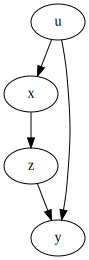

In [1]:
import graphviz
g5 = graphviz.Digraph('G', format='svg')
g5.edge('x', 'z')
g5.edge('z', 'y')
g5.edge('u', 'y')
g5.edge('u', 'x')
g5